# Laboratorio Parte 1: Tensorflow, MNIST data y redes totalmente conectadas (FC)

In [1]:
# importo librerias necesarias     
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [6]:
from tensorflow.examples.tutorials.mnist import input_data

# importo y guardo MNIST data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


## Exploremos un poco el dataset

In [7]:
# dimensiones de la data
print("Imagenes de Entrenamiento: " + str(mnist.train.images.shape))
print("Labels de Entrenamiento: " + str(mnist.train.labels.shape))

print("Imagenes de Testeo: " + str(mnist.test.images.shape))
print("Labels de Testeo: " + str(mnist.test.labels.shape))

Imagenes de Entrenamiento: (55000, 784)
Labels de Entrenamiento: (55000, 10)
Imagenes de Testeo: (10000, 784)
Labels de Testeo: (10000, 10)


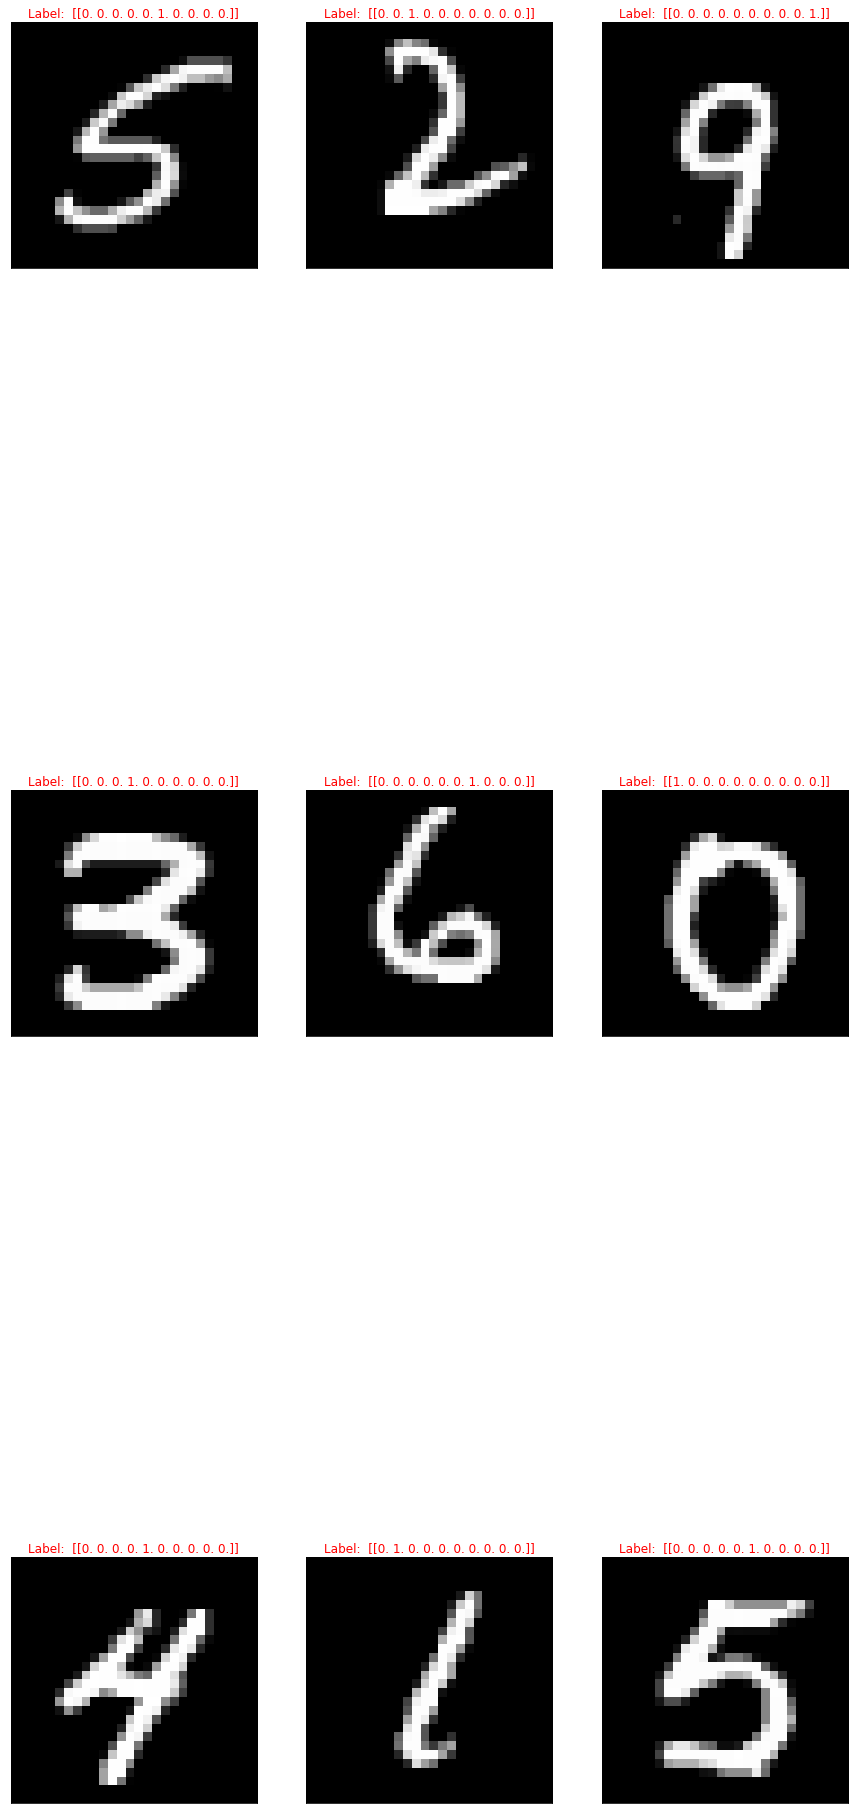

In [8]:
# visualizamos algunas imagenes
fig, ax = plt.subplots(3, 3, figsize=[15, 40])

random_image = np.random.randint(low=0, high=55000, size=1)

for j in range(3):
    for i in range(3):
        
       random_image = np.random.randint(low=0, high=55000, size=1)

       ax[i,j].imshow(mnist.train.images[random_image].reshape(28,28), 'gray')
       ax[i,j].set_xticks([])
       ax[i,j].set_yticks([])
       ax[i,j].set_title('Label:  ' + str(mnist.train.labels[random_image]), color='r')


#fig.subplots_adjust(wspace=0.1, hspace=0)
plt.show()

## Definamos un modelo

Defino los inputs y los outputs 

In [11]:
### A completar: defino inputs y outputs

x = tf.placeholder(tf.float32, [None, 784])
y_= tf.placeholder(tf.float32, [None, 10])

###

Declaro variables entrenables (pesos y bias)

In [12]:
### A completar: defino varibales entrenables

W_1 = tf.Variable(tf.zeros([784, 30]))
b_1 = tf.Variable(tf.zeros([30]))

W_2 = tf.Variable(tf.zeros([30, 10]))
b_2 = tf.Variable(tf.zeros([10]))

##

Instructions for updating:
Colocations handled automatically by placer.


Defino el modelo

In [13]:
# consiste en la capa de entrada, una capa oculta, y capa de salida
hidden_1 = tf.nn.sigmoid(tf.matmul(x, W_1) + b_1)
y = tf.nn.softmax(tf.matmul(hidden_1, W_2) + b_2)

In [14]:
### A completar: definir funcion de costo y optimizador

loss = tf.reduce_sum(tf.square(y - y_))

train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

###

In [15]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [16]:
batchSize, epochs = 64, 10000

## Entrenemos esta Red Neuronal!

In [17]:
accuracyAcumulated_train = []
accuracyAcumulated_test = []

with tf.Session() as sess:
    
 sess.run(tf.global_variables_initializer())

 for epoch in range(epochs):
        
  batch_x, batch_y = mnist.train.next_batch(batchSize)
  train_step.run(feed_dict={x: batch_x, y_: batch_y})
    
  if epoch % 500 == 0:
    
    accuracy_train = accuracy.eval(feed_dict={x: mnist.train.images, y_: mnist.train.labels})
    accuracy_test = accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels})
    
    accuracyAcumulated_train.append(accuracy_train)
    accuracyAcumulated_test.append(accuracy_test)
    
    print("Epoch : "+str(epoch) + '. Train Accuracy: {} Test Accuracy: {}'.format(accuracy_train, accuracy_test))

 print('Test Final Accuracy %g' % accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))



Epoch : 0. Train Accuracy: 0.09916363656520844 Test Accuracy: 0.10090000182390213
Epoch : 500. Train Accuracy: 0.22987273335456848 Test Accuracy: 0.2295999974012375
Epoch : 1000. Train Accuracy: 0.2797272801399231 Test Accuracy: 0.2800000011920929
Epoch : 1500. Train Accuracy: 0.309727281332016 Test Accuracy: 0.3073999881744385
Epoch : 2000. Train Accuracy: 0.6307818293571472 Test Accuracy: 0.6330999732017517
Epoch : 2500. Train Accuracy: 0.7440181970596313 Test Accuracy: 0.7505000233650208
Epoch : 3000. Train Accuracy: 0.7591090798377991 Test Accuracy: 0.7652999758720398
Epoch : 3500. Train Accuracy: 0.7791454792022705 Test Accuracy: 0.784500002861023
Epoch : 4000. Train Accuracy: 0.7967818379402161 Test Accuracy: 0.7991999983787537
Epoch : 4500. Train Accuracy: 0.7961272597312927 Test Accuracy: 0.8004999756813049
Epoch : 5000. Train Accuracy: 0.7960181832313538 Test Accuracy: 0.7971000075340271
Epoch : 5500. Train Accuracy: 0.7995272874832153 Test Accuracy: 0.8001000285148621
Epoch :

<Figure size 432x288 with 0 Axes>

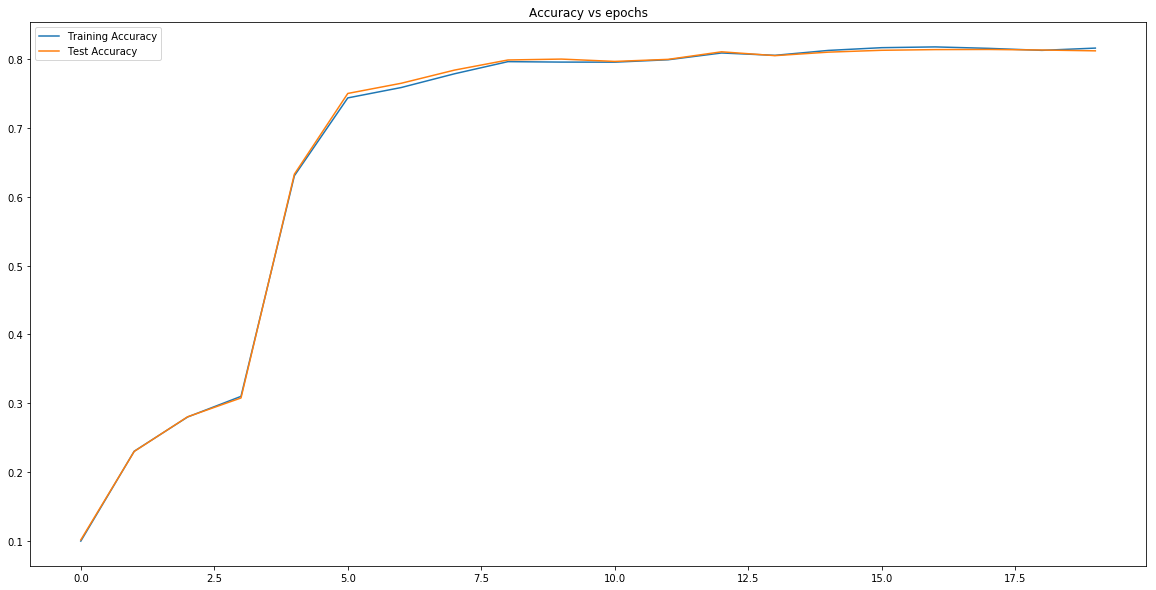

In [33]:
plt.figure()
plt.figure(figsize=(20,10)) 
plt.title("Accuracy vs epochs")
plt.plot(accuracyAcumulated_train)
plt.plot(accuracyAcumulated_test)
plt.legend(['Training Accuracy', 'Test Accuracy'])

## Para seguir practicando: 

 
    1) probar con distintas funciones de activación
    2) agregar/quitar hidden layers
    3) modificar valor del learning rate y/o optimizador

# Laboratorio Parte 2: Keras, MNIST data y redes neuronales convolucionales (CNN)

In [22]:
## importemos las librerias que necesitamos para esta parte (algunas ya las importamos al principio)

from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [27]:
### A completar: definir capa de entrada, capas ocultas, y capa de salida

inputs = #Input(shape=(784,))
layer1 = #Dense(64, activation='relu')(inputs)
layer2 = #Dense(64, activation='relu')(layer1)
predictiones = #Dense(10, activation='softmax')(layer2)

###

In [ ]:
model = Model(inputs=inputs, outputs=predictiones)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
%%time
history=model.fit(mnist.train.images, mnist.train.labels,
              batch_size=batchSize,
              epochs=10, validation_data=(mnist.test.images, mnist.test.labels))

Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 1s 27us/step - loss: 0.0247 - acc: 0.9928 - val_loss: 0.1058 - val_acc: 0.9748
Epoch 2/10
55000/55000 [==============================] - 1s 27us/step - loss: 0.0215 - acc: 0.9934 - val_loss: 0.1188 - val_acc: 0.9729
Epoch 3/10
55000/55000 [==============================] - 2s 28us/step - loss: 0.0201 - acc: 0.9945 - val_loss: 0.1182 - val_acc: 0.9730
Epoch 4/10
55000/55000 [==============================] - 2s 28us/step - loss: 0.0181 - acc: 0.9948 - val_loss: 0.1226 - val_acc: 0.9756
Epoch 5/10
55000/55000 [==============================] - 1s 26us/step - loss: 0.0164 - acc: 0.9951 - val_loss: 0.1122 - val_acc: 0.9763
Epoch 6/10
55000/55000 [==============================] - 2s 29us/step - loss: 0.0135 - acc: 0.9960 - val_loss: 0.1168 - val_acc: 0.9773
Epoch 7/10
55000/55000 [==============================] - 2s 28us/step - loss: 0.0143 - acc: 0.9956 - val_loss: 0.1283 - val_acc

La precision de clasificacion sobre el set de valiudación es de 0.9751, mucho mejor que lo anterior!

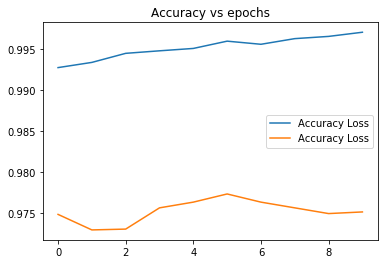

In [34]:
plt.figure()
plt.title("Accuracy vs epochs")
plt.plot( history.history['acc'] )
plt.plot( history.history['val_acc'] )
plt.legend(['Accuracy Loss', 'Accuracy Loss'])

## Usemos este modelo para hacer predicciones
### (sobre imagenes que la red nunca "vio")

In [53]:
predictions = model.predict(mnist.test.images)

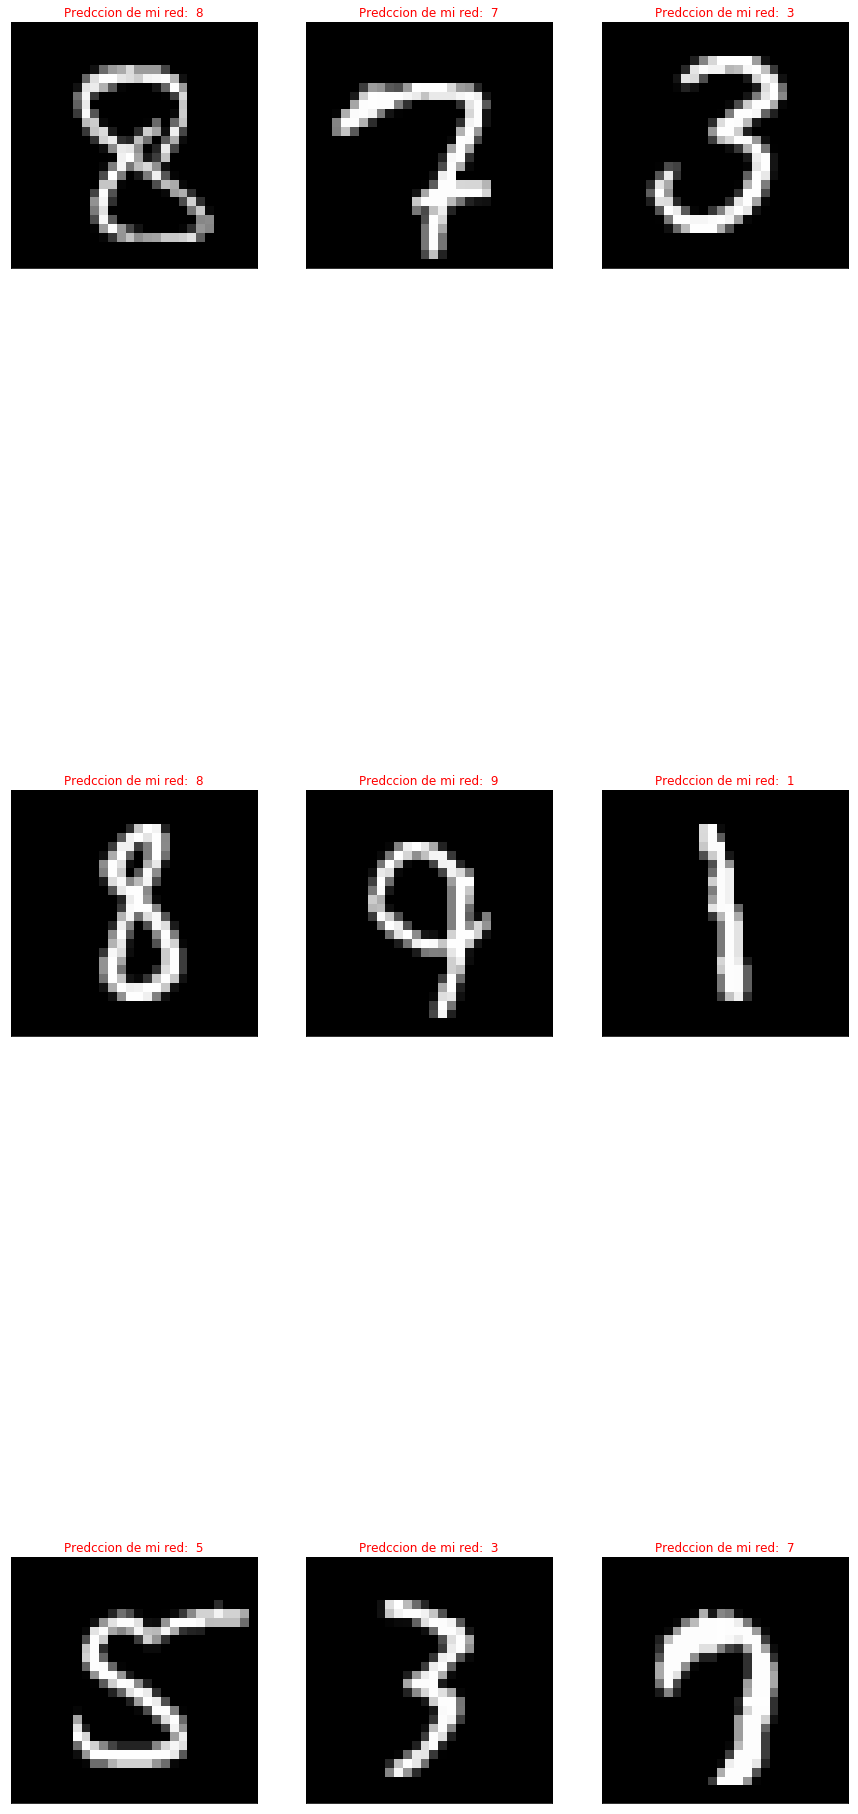

In [56]:
fig, ax = plt.subplots(3, 3, figsize=[15, 40])


for j in range(3):
    for i in range(3):
        
       random_image = np.random.randint(low=0, high=1000, size=1)

       ax[i,j].imshow(mnist.test.images[random_image].reshape(28,28), 'gray')
       ax[i,j].set_xticks([])
       ax[i,j].set_yticks([])
       ax[i,j].set_title('Predccion de mi red:  ' + str(np.argmax(predictions[random_image])), color='r')

plt.show()